<a href="https://colab.research.google.com/github/ashlearo/ML/blob/main/%D0%95%D1%80%D0%BC%D0%B0%D0%BA%D0%BE%D0%B2_%D0%94%D0%97_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from scipy import stats

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving device_data.csv to device_data.csv


In [ ]:
df = pd.read_csv("device_data.csv")
df.head()

,device_0
0,11.351129
1,3.620408
2,3.124705
3,4.492902
4,6.075119


In [ ]:
df.describe()

,device_0
count,267.000000
mean,4.883416
std,3.057072
min,-4.367143
25%,2.819708
50%,5.091945
75%,6.772408
max,12.174385


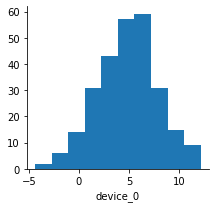

In [ ]:
g = sns.FacetGrid(df)
g.map(plt.hist,"device_0")
g.add_legend()
plt.show()

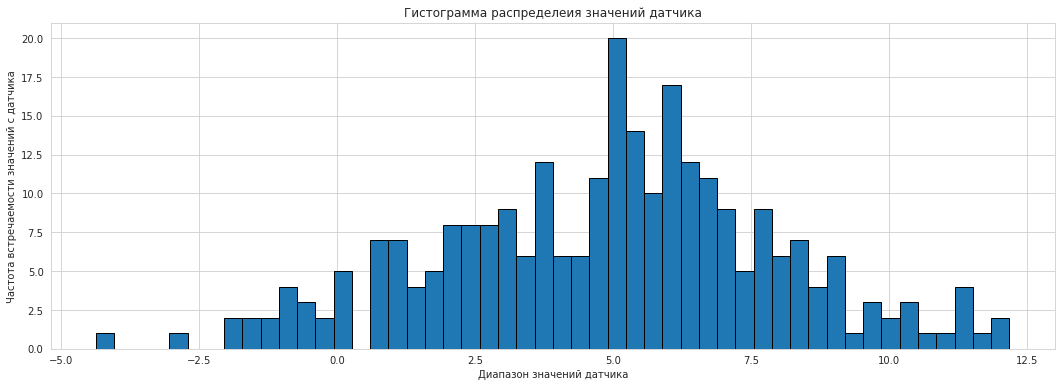

In [ ]:
df.device_0.plot( kind="hist", bins = 50, edgecolor = 'black', figsize=(18,6))

plt.xlabel('Диапазон значений датчика')
plt.ylabel('Частота встречаемости значений с датчика')
plt.title('Гистограмма распределеия значений датчика')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


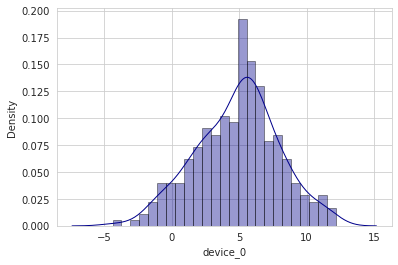

In [ ]:
sns.distplot(df['device_0'], hist=True, kde=True,
             bins=25, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
plt.show()


Вопрос 2.    Значения с датчика можно описать нормальным распределением

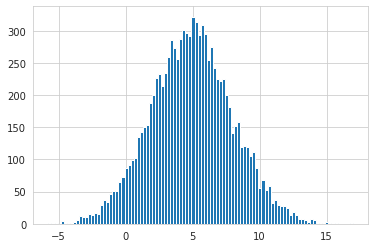

(4.887628954767739, 3.044767918964359)


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
μ = 4.88  # Математическое ожидание
σ = 3.07  # Дисперсия
x = μ + σ * np.random.randn(10000)  # Нормальное распределение
plt.hist(x, bins=100)  # Отображение гистограммы
plt.show()
print(norm.fit(x))




*Вопрос* 3.
\μ = 4.88  # Математическое ожидание
σ = 3.06  # Дисперсия

# ***Далее надо посторить совместный график    , столкнулся со сложностями, как разместить на одном графике нормальное распределение и значения с датчика***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

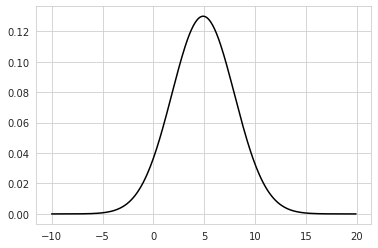

In [ ]:
data = np.arange(-10,20,0.1)
pdf_1 = stats.norm.pdf(data , loc = 4.88 , scale = 3.06 )

pdf_2 = df.device_0

#Visualizing the distribution

sns.set_style('whitegrid')
sns.lineplot(data, pdf_1 , color = 'black')
sns.lineplot(data, pdf_2 , color = 'blue')
plt.ylabel('Probability Density')

In [ ]:
type(pdf_1)

numpy.ndarray

In [ ]:
type(pdf_2)

pandas.core.series.Series

In [ ]:
df_1 = df.assign(F = pdf_1)

In [ ]:
df_1.head

<bound method NDFrame.head of       device_0         F
0    11.351129  0.000020
1     3.620408  0.000022
2     3.124705  0.000026
3     4.492902  0.000029
4     6.075119  0.000034
..         ...       ...
262   5.997939  0.000011
263   4.170321  0.000009
264  11.276290  0.000008
265   9.557307  0.000007
266  -1.822290  0.000006

[267 rows x 2 columns]>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Probability Density')

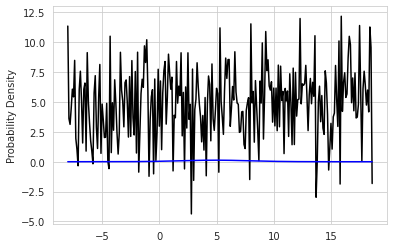

In [ ]:
sns.set_style('whitegrid')
sns.lineplot(data, df_1.device_0 , color = 'black')
sns.lineplot(data, df_1.F , color = 'blue')
plt.ylabel('Probability Density')

In [ ]:
df_2=df.sort_values('device_0')
df_2

,device_0
108,-4.367143
217,-2.972352
238,-1.865650
266,-1.822290
110,-1.559792
...,...
0,11.351129
255,11.397680
160,11.536147
203,11.985303


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Probability Density')

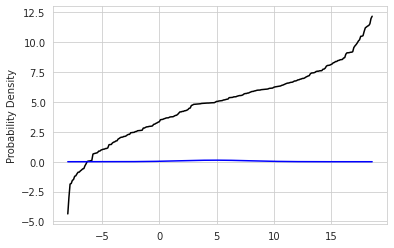

In [ ]:
data_2 = np.arange(-8,18.7,0.1)
sns.set_style('whitegrid')
sns.lineplot(data_2, df_2.device_0 , color = 'black')
sns.lineplot(data_2, df_1.F , color = 'blue')
plt.ylabel('Probability Density')

# Итоговый вариант - графики нормального распределения с заданными параметрами и значения датчика

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


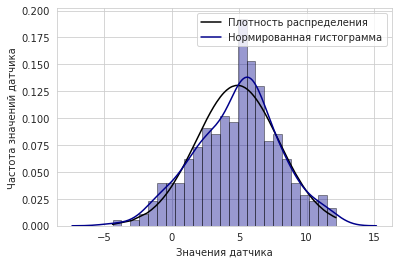

In [ ]:
data = df.device_0.values
pdf_1 = stats.norm.pdf(data , loc = 4.883 , scale = 3.057 )

sns.set_style('whitegrid')
sns.lineplot(data, pdf_1 , color = 'black')
sns.distplot(data, hist=True, kde=True,
             bins=25, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1.5})

plt.ylabel('Частота значений датчика')
plt.xlabel('Значения датчика')
plt.legend(labels=["Плотность распределения", "Нормированная гистограмма"])
plt.show()